In [179]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [180]:
data=pd.read_csv('/content/House _Price_Prediction.csv')

In [181]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [182]:
data.shape

(1460, 81)

In [183]:
(data.isnull().sum()/len(data)*100)

Id                0.000000
MSSubClass        0.000000
MSZoning          0.000000
LotFrontage      17.739726
LotArea           0.000000
                   ...    
MoSold            0.000000
YrSold            0.000000
SaleType          0.000000
SaleCondition     0.000000
SalePrice         0.000000
Length: 81, dtype: float64

In [184]:
data['Alley'].isnull().sum()

1369

In [185]:
data[['PoolQC','Fence','MiscFeature']].isnull().sum()

PoolQC         1453
Fence          1179
MiscFeature    1406
dtype: int64

In [186]:
data.drop(['PoolQC','Fence','MiscFeature','Alley'],axis=1,inplace=True)

In [187]:
data[['LotFrontage','SalePrice']].corr()

,LotFrontage,SalePrice
LotFrontage,1.000000,0.351799
SalePrice,0.351799,1.000000


In [188]:
data.drop('LotFrontage',axis=1,inplace=True)

In [189]:
data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotArea', 'Street', 'LotShape',
       'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces',
       'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive',
       'WoodDeckSF', 'OpenPo

In [190]:
data.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotArea          0
Street           0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 76, dtype: int64

In [191]:
data['MasVnrType'].isnull().sum()

872

In [192]:
data.drop('MasVnrType',axis=1,inplace=True)

In [193]:
data[['Fireplaces','FireplaceQu']].isnull().sum()

Fireplaces       0
FireplaceQu    690
dtype: int64

In [194]:
data['FireplaceQu'].dtypes

dtype('O')

<Axes: >

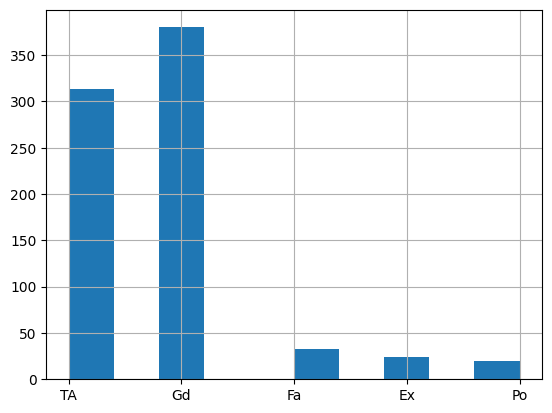

In [195]:
data['FireplaceQu'].hist()

In [196]:
data['FireplaceQu'].fillna(data['FireplaceQu'].mode()[0],inplace=True)

In [197]:
data.head()

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [198]:
data.drop('Id',axis=1,inplace=True)

In [199]:
data.describe()

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [200]:
data.describe(include='object')

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
count,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,...,1460,1460,1460,1379,1379,1379,1379,1460,1460,1460
unique,5,2,4,4,2,5,3,25,9,8,...,4,7,5,6,3,5,5,3,9,6
top,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,...,TA,Typ,Gd,Attchd,Unf,TA,TA,Y,WD,Normal
freq,1151,1454,925,1311,1459,1052,1382,225,1260,1445,...,735,1360,1070,870,605,1311,1326,1340,1267,1198


In [201]:
data.isnull().sum().sum()

601

In [202]:
def f1(para):
  if data[para].dtypes=='object':
    data[para].fillna(data[para].mode()[0],inplace=True)
  else:
    data[para].fillna(data[para].mean(),inplace=True)
  return data

In [203]:
for i in data.columns:
  f1(i)

In [204]:
data.isnull().sum().sum()

0

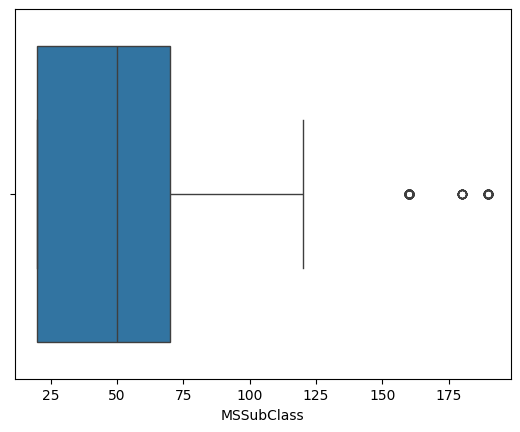

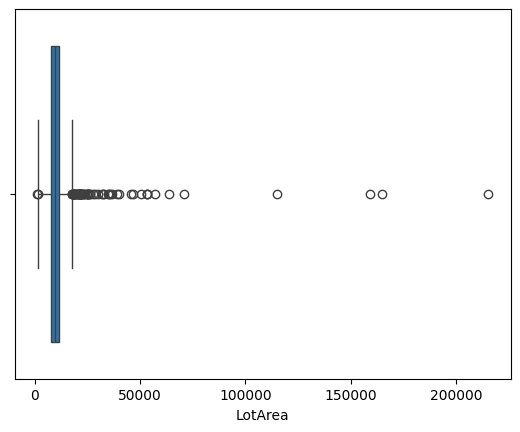

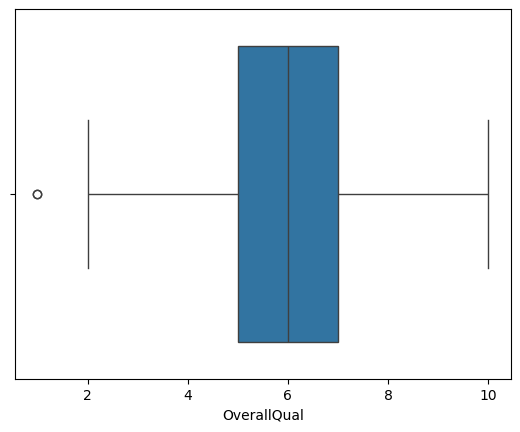

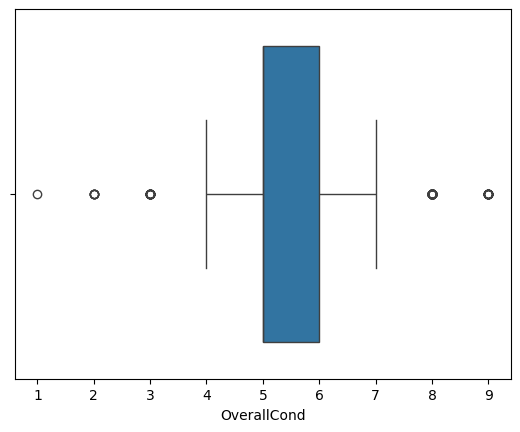

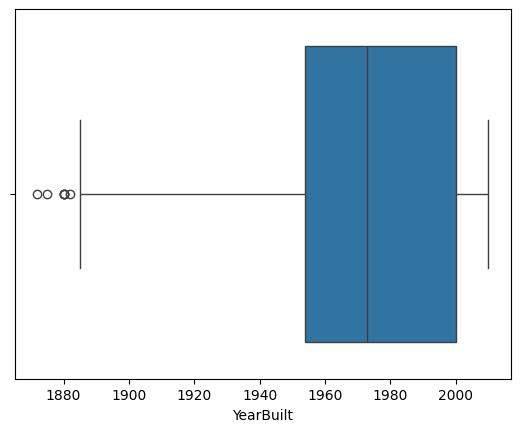

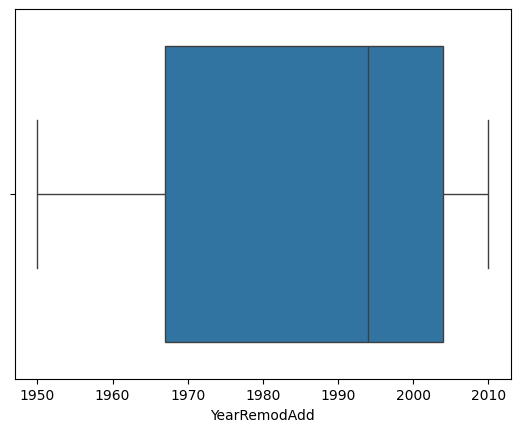

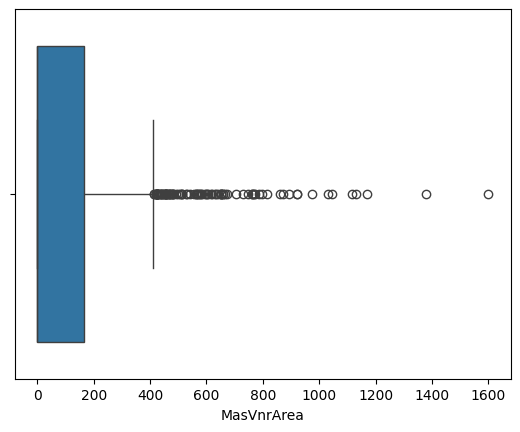

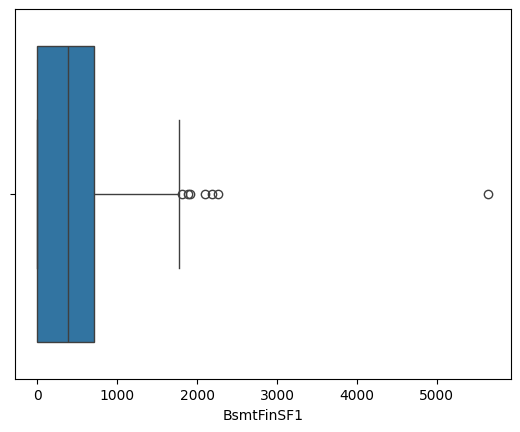

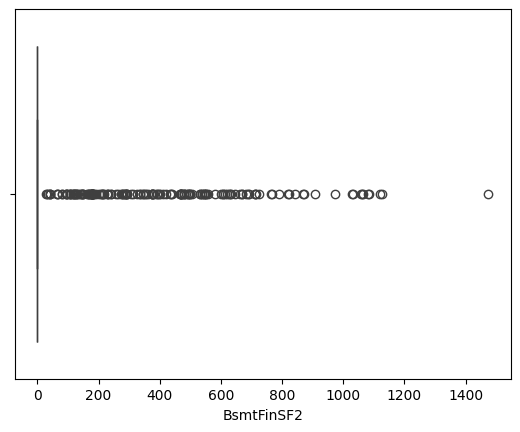

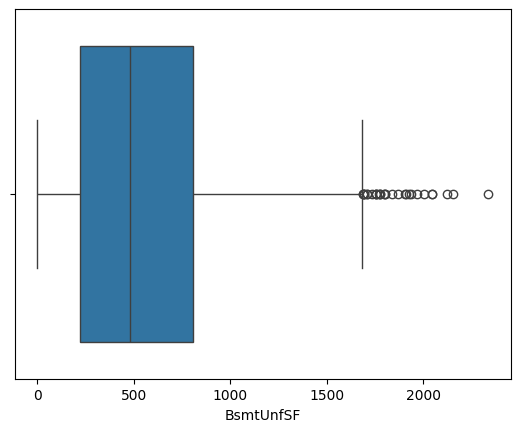

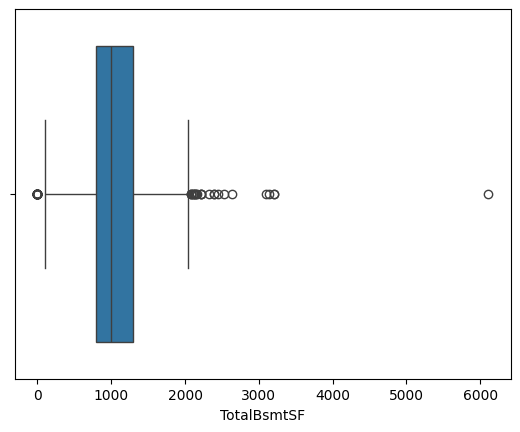

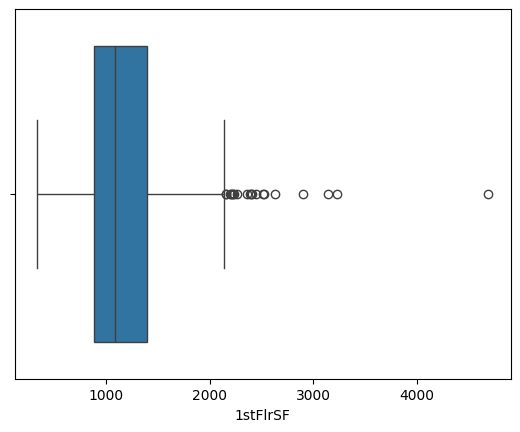

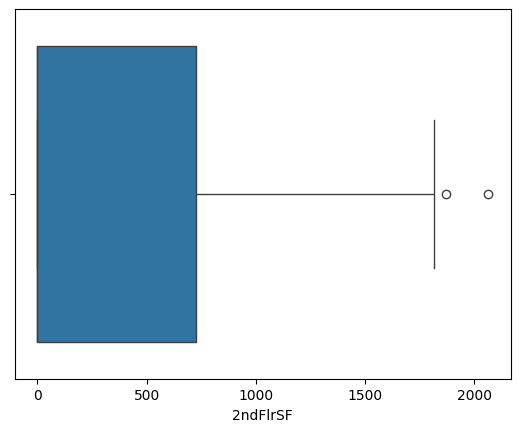

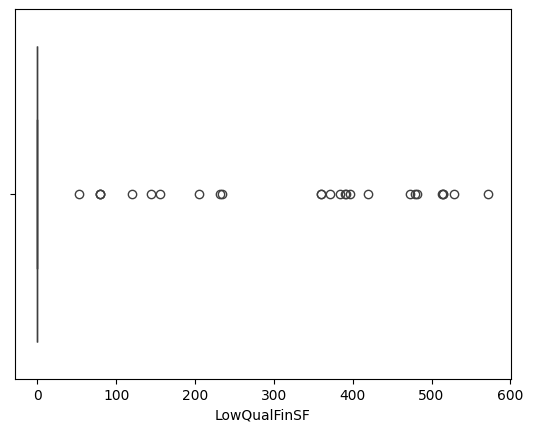

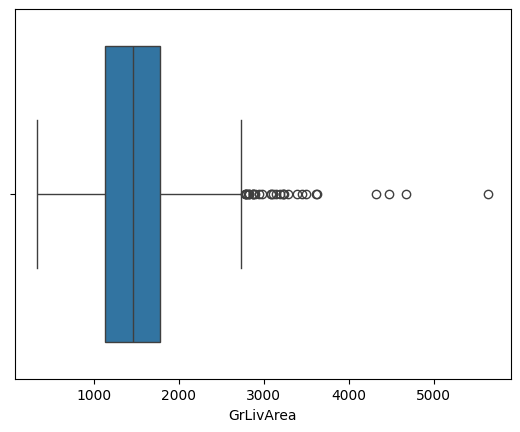

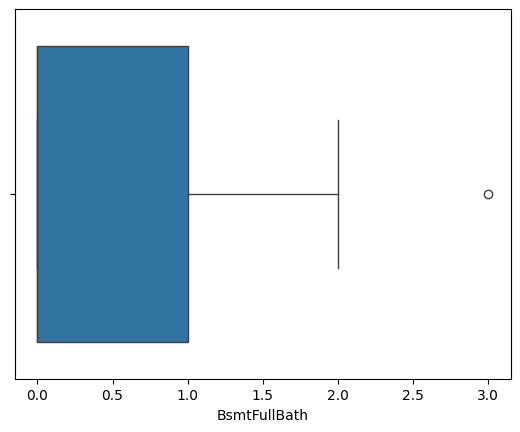

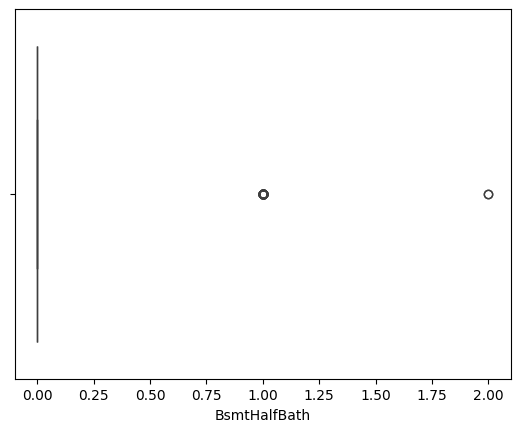

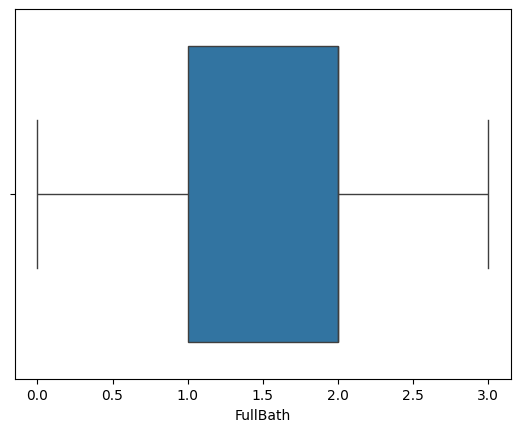

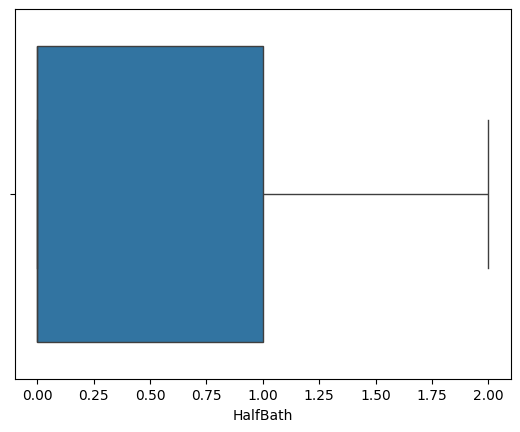

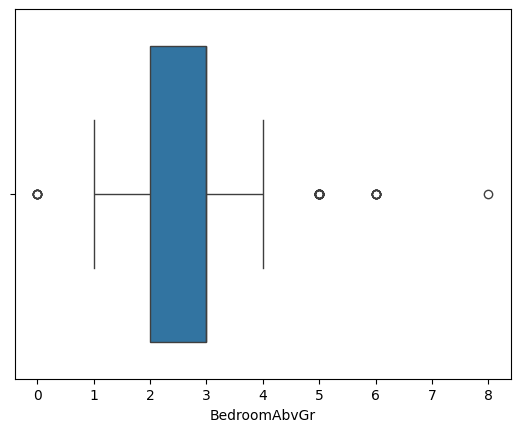

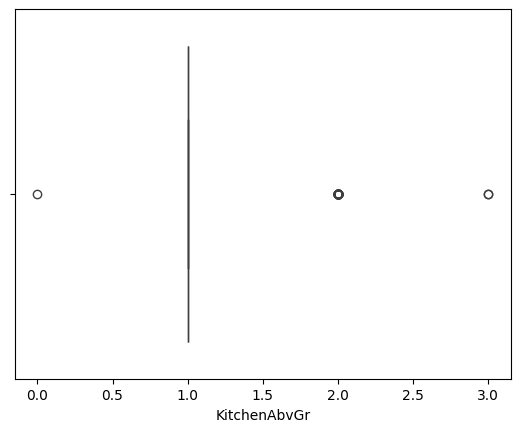

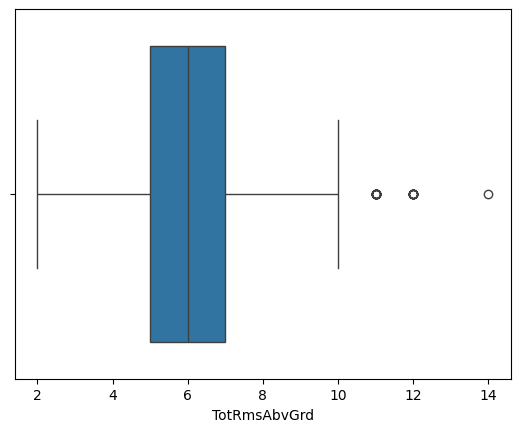

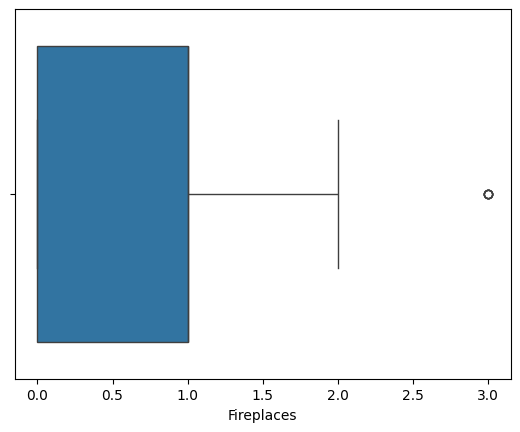

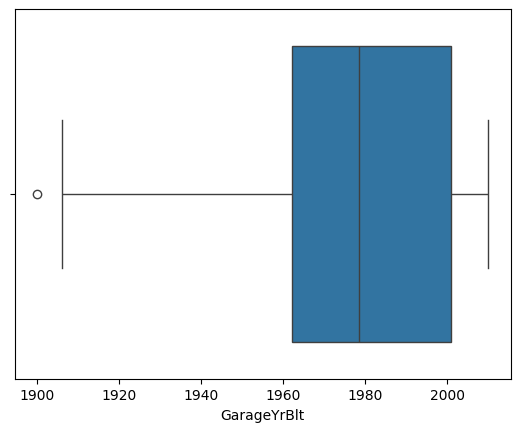

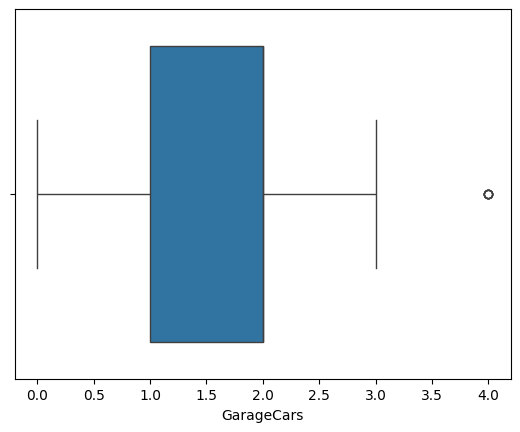

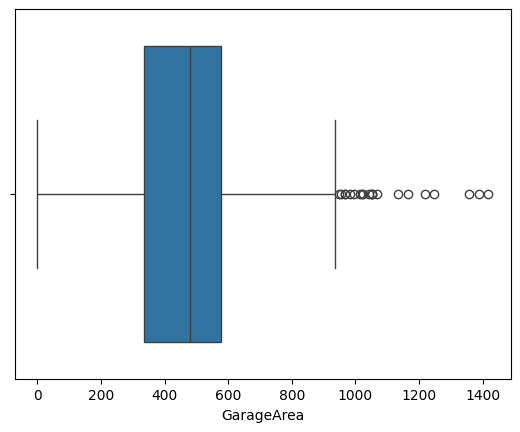

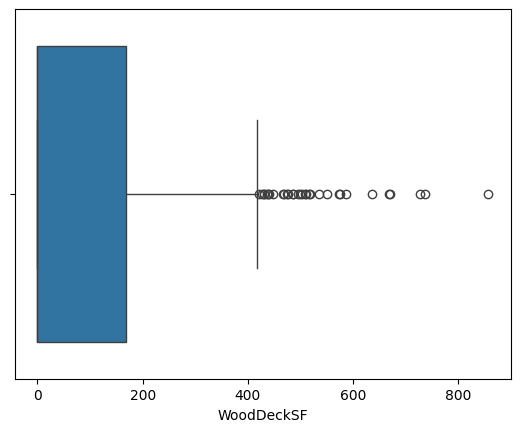

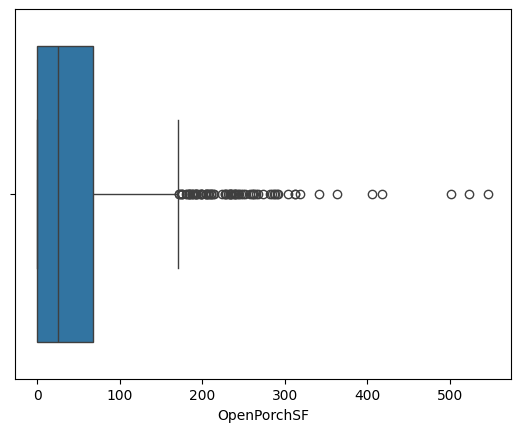

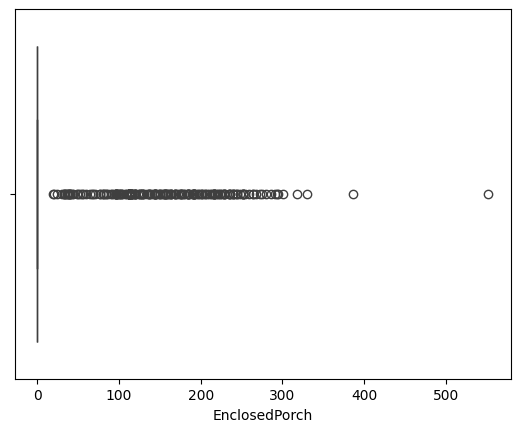

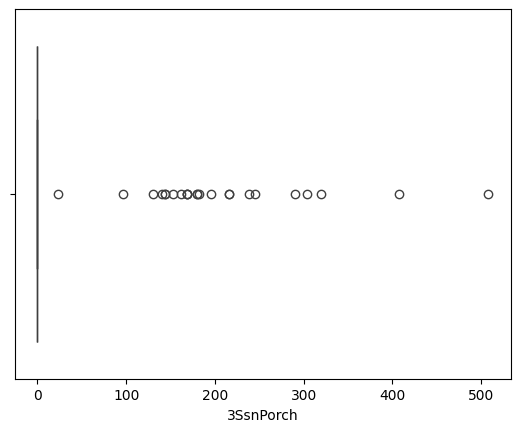

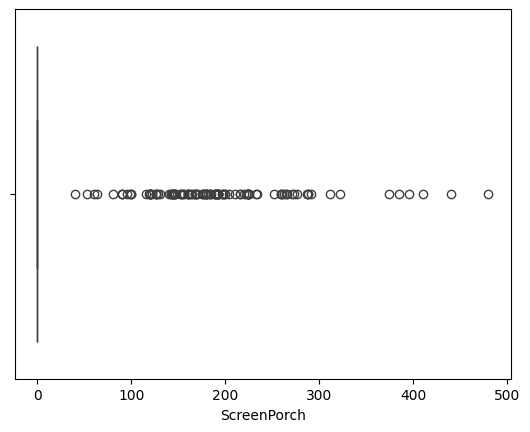

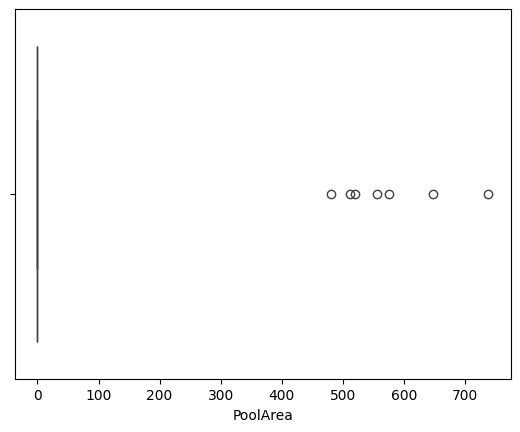

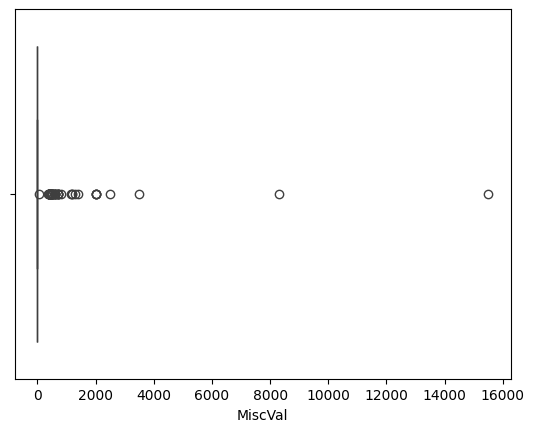

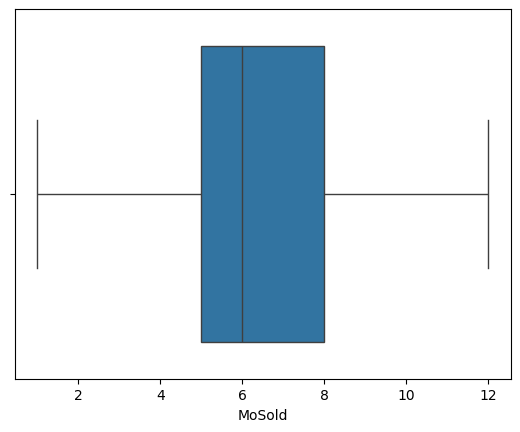

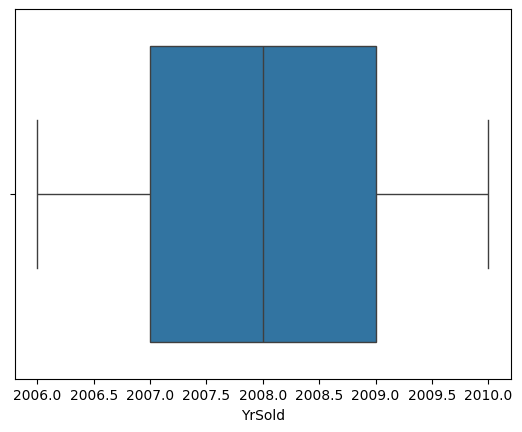

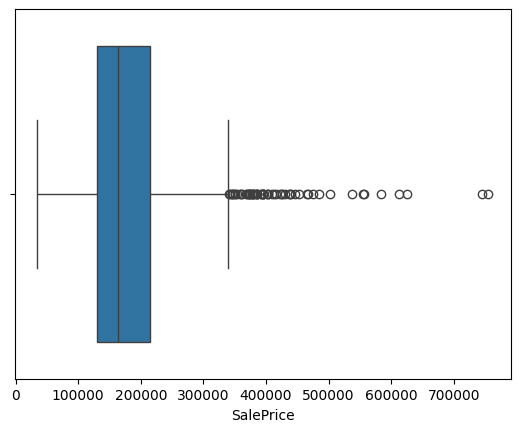

In [205]:
for i in data.select_dtypes([int,float]):
  sns.boxplot(data=data,x=i)
  plt.show()

In [206]:
def treat_outliers(data,col):
  q1=data[col].quantile(0.25)
  q3=data[col].quantile(0.75)
  iqr=q3-q1
  ul=q3+1.5*iqr
  ll=q1-1.5*iqr
  data[col]=np.where(data[col]>ul,ul,np.where(data[col]<ll,ll,data[col]))
  return data

In [207]:
for i in data.select_dtypes([int,float]):
  data=treat_outliers(data,i)

In [209]:
data.isnull().sum().sum()

0

In [210]:
data.skew(numeric_only=True)

MSSubClass       1.019624
LotArea          0.208492
OverallQual      0.249513
OverallCond      0.579334
YearBuilt       -0.594020
YearRemodAdd    -0.503562
MasVnrArea       1.281293
BsmtFinSF1       0.739877
BsmtFinSF2       0.000000
BsmtUnfSF        0.796931
TotalBsmtSF      0.237240
1stFlrSF         0.664134
2ndFlrSF         0.800109
LowQualFinSF     0.000000
GrLivArea        0.593556
BsmtFullBath     0.563057
BsmtHalfBath     0.000000
FullBath         0.036562
HalfBath         0.675897
BedroomAbvGr    -0.253298
KitchenAbvGr     0.000000
TotRmsAbvGrd     0.366919
Fireplaces       0.584655
GarageYrBlt     -0.666040
GarageCars      -0.391629
GarageArea      -0.069685
WoodDeckSF       1.083673
OpenPorchSF      1.136301
EnclosedPorch    0.000000
3SsnPorch        0.000000
ScreenPorch      0.000000
PoolArea         0.000000
MiscVal          0.000000
MoSold           0.212053
YrSold           0.096269
SalePrice        0.802786
dtype: float64

In [211]:
data.select_dtypes([int,float]).head()

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60.0,8450.0,7.0,5.0,2003.0,2003.0,196.0,706.0,0.0,150.0,...,0.0,61.0,0.0,0.0,0.0,0.0,0.0,2.0,2008.0,208500.0
1,20.0,9600.0,6.0,7.5,1976.0,1976.0,0.0,978.0,0.0,284.0,...,298.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,2007.0,181500.0
2,60.0,11250.0,7.0,5.0,2001.0,2002.0,162.0,486.0,0.0,434.0,...,0.0,42.0,0.0,0.0,0.0,0.0,0.0,9.0,2008.0,223500.0
3,70.0,9550.0,7.0,5.0,1915.0,1970.0,0.0,216.0,0.0,540.0,...,0.0,35.0,0.0,0.0,0.0,0.0,0.0,2.0,2006.0,140000.0
4,60.0,14260.0,8.0,5.0,2000.0,2000.0,350.0,655.0,0.0,490.0,...,192.0,84.0,0.0,0.0,0.0,0.0,0.0,12.0,2008.0,250000.0


In [212]:
def f2(col):
  data.replace(0.0,data[col].median(),inplace=True)
  return data

In [213]:
for i in data.select_dtypes([int,float]):
  f2(i)

In [215]:
data.isnull().sum().sum()

0

In [216]:
data.isnull().sum().sum()

0

In [217]:
data.select_dtypes([int,float]).corr()

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
MSSubClass,1.000000,-0.403395,0.062802,-0.085384,0.055790,0.058578,0.030156,-0.077237,NaN,-0.132031,...,-0.024599,-0.012625,NaN,NaN,NaN,NaN,NaN,-0.003956,-0.021216,-0.061456
LotArea,-0.403395,1.000000,0.221597,-0.026494,0.065765,0.054472,0.149191,0.220823,NaN,0.086864,...,0.208906,0.134068,NaN,NaN,NaN,NaN,NaN,0.003855,-0.036831,0.435876
OverallQual,0.062802,0.221597,1.000000,-0.134096,0.575160,0.550829,0.402997,0.237120,NaN,0.298431,...,0.225291,0.203572,NaN,NaN,NaN,NaN,NaN,0.069460,-0.027299,0.817680
OverallCond,-0.085384,-0.026494,-0.134096,1.000000,-0.399685,0.038429,-0.140868,-0.050238,NaN,-0.151220,...,-0.000041,-0.019273,NaN,NaN,NaN,NaN,NaN,-0.009981,0.046162,-0.105920
YearBuilt,0.055790,0.065765,0.575160,-0.399685,1.000000,0.594909,0.317222,0.255021,NaN,0.144193,...,0.207545,0.090431,NaN,NaN,NaN,NaN,NaN,0.012885,-0.013292,0.570327
YearRemodAdd,0.058578,0.054472,0.550829,0.038429,0.594909,1.000000,0.169617,0.131173,NaN,0.175324,...,0.193696,0.129077,NaN,NaN,NaN,NaN,NaN,0.021490,0.035743,0.552061
MasVnrArea,0.030156,0.149191,0.402997,-0.140868,0.317222,0.169617,1.000000,0.242588,NaN,0.102209,...,0.162733,0.125605,NaN,NaN,NaN,NaN,NaN,0.006167,0.003945,0.445271
BsmtFinSF1,-0.077237,0.220823,0.237120,-0.050238,0.255021,0.131173,0.242588,1.000000,NaN,-0.520939,...,0.215792,0.066564,NaN,NaN,NaN,NaN,NaN,-0.003382,0.012401,0.394546
BsmtFinSF2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BsmtUnfSF,-0.132031,0.086864,0.298431,-0.151220,0.144193,0.175324,0.102209,-0.520939,NaN,1.000000,...,-0.020981,0.080116,NaN,NaN,NaN,NaN,NaN,0.036272,-0.043362,0.212886


In [218]:
data.drop(['MSSubClass','OverallCond','BsmtFinSF2','BsmtUnfSF','OpenPorchSF','EnclosedPorch','3SsnPorch',
           'ScreenPorch','PoolArea','MiscVal','MoSold','YrSold'],axis=1, inplace=True)

In [219]:
data.select_dtypes([int,float]).corr()

,LotArea,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,...,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,SalePrice
LotArea,1.000000,0.221597,0.065765,0.054472,0.149191,0.220823,0.361769,0.458118,0.127920,NaN,...,-0.098364,0.304671,NaN,0.395016,-0.308739,0.015327,-0.131826,0.346693,0.208906,0.435876
OverallQual,0.221597,1.000000,0.575160,0.550829,0.402997,0.237120,0.541432,0.473937,0.300405,NaN,...,-0.292875,0.116727,NaN,0.435768,-0.438515,0.519893,-0.227654,0.570633,0.225291,0.817680
YearBuilt,0.065765,0.575160,1.000000,0.594909,0.317222,0.255021,0.410450,0.288418,0.017871,NaN,...,-0.254227,-0.055110,NaN,0.106356,-0.222542,0.782454,-0.201785,0.489098,0.207545,0.570327
YearRemodAdd,0.054472,0.550829,0.594909,1.000000,0.169617,0.131173,0.301581,0.246660,0.144168,NaN,...,-0.195556,-0.035015,NaN,0.196675,-0.170685,0.618391,-0.089577,0.382263,0.193696,0.552061
MasVnrArea,0.149191,0.402997,0.317222,0.169617,1.000000,0.242588,0.342758,0.324143,0.166451,NaN,...,-0.207490,0.131113,NaN,0.283849,-0.265558,0.244827,-0.104922,0.380398,0.162733,0.445271
BsmtFinSF1,0.220823,0.237120,0.255021,0.131173,0.242588,1.000000,0.471150,0.402194,-0.149210,NaN,...,0.007187,-0.110201,NaN,0.024594,-0.188062,0.153669,-0.098688,0.286849,0.215792,0.394546
TotalBsmtSF,0.361769,0.541432,0.410450,0.301581,0.342758,0.471150,1.000000,0.807158,-0.197262,NaN,...,0.068359,0.048901,NaN,0.271000,-0.319220,0.322837,-0.145294,0.490673,0.236752,0.645251
1stFlrSF,0.458118,0.473937,0.288418,0.246660,0.324143,0.402194,0.807158,1.000000,-0.217629,NaN,...,0.139698,0.128034,NaN,0.401272,-0.383127,0.230209,-0.136518,0.492981,0.240094,0.621873
2ndFlrSF,0.127920,0.300405,0.017871,0.144168,0.166451,-0.149210,-0.197262,-0.217629,1.000000,NaN,...,-0.617472,0.516432,NaN,0.615076,-0.211211,0.074483,-0.051432,0.149596,0.089114,0.325008
LowQualFinSF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [220]:
data.drop(['LowQualFinSF','BedroomAbvGr','KitchenAbvGr','GarageCars','WoodDeckSF'],axis=1,inplace=True)

In [221]:
data.shape

(1460, 57)

In [222]:
data=pd.get_dummies(data,drop_first=True)

In [223]:
X=data.drop('SalePrice',axis=1)
y=data['SalePrice']

In [224]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [225]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
rf.fit(X_train,y_train)

RandomForestRegressor()

In [227]:
rf.score(X_train,y_train)

0.9829970996587167

In [228]:
rf.score(X_test,y_test)

0.9097852026253805

In [229]:
from sklearn.linear_model import LinearRegression

In [231]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [232]:
lr.fit(X_train,y_train)

LinearRegression()

In [234]:
lr.score(X_train,y_train)

0.9408450110598784

In [235]:
lr.score(X_test,y_test)

0.8597601043305811

In [236]:
from sklearn.neighbors import KNeighborsRegressor

In [249]:
knn=KNeighborsRegressor(n_neighbors=5)

In [250]:
knn.fit(X_train,y_train)

KNeighborsRegressor()

In [251]:
knn.score(X_train,y_train)

0.8156479013252962

In [252]:
knn.score(X_test,y_test)

0.7628719164536333

In [254]:
from sklearn.tree import DecisionTreeRegressor

In [256]:
dtr=DecisionTreeRegressor()

In [258]:
dtr.fit(X_train,y_train)

DecisionTreeRegressor()

In [259]:
dtr.score(X_train,y_train)

1.0

In [260]:
dtr.score(X_test,y_test)

0.7555617190428645

# Hyper Parameter Tunning Technique
- GridSearchCV
- RandomizedSearchCV

In [265]:
RF=RandomForestRegressor(random_state=42)

In [261]:
parameter={'criterion':["squared_error", "absolute_error", "friedman_mse", "poisson"],
           'n_estimators':range(100,150),
           'max_depth':range(1,5)}

In [262]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

In [267]:
RSCV=RandomizedSearchCV(estimator=RF,param_distributions=parameter,scoring='r2')

In [268]:
RSCV.fit(X_train,y_train)

RandomizedSearchCV(estimator=RandomForestRegressor(random_state=42),
                   param_distributions={'criterion': ['squared_error',
                                                      'absolute_error',
                                                      'friedman_mse',
                                                      'poisson'],
                                        'max_depth': range(1, 5),
                                        'n_estimators': range(100, 150)},
                   scoring='r2')

In [269]:
RSCV.best_params_

{'n_estimators': 107, 'max_depth': 4, 'criterion': 'friedman_mse'}

In [270]:
RSCV.best_score_

0.8204979816407958

In [274]:
GSCV=GridSearchCV(estimator=RF,param_grid=parameter,scoring='r2')

In [275]:
GSCV.fit(X_train,y_train)

KeyboardInterrupt: 

In [ ]:
# GSCV.best_params_

In [ ]:
# GSCV.best_score_